<a href="https://colab.research.google.com/github/Gabriela-Alcaide/Analise_basica_introducao/blob/main/Projeto_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet escolhido: Salários de Profissionais de DataScience.

Coluna Alvo: 'salary_in_usd'

In [ ]:
# Importar as dependências necessárias.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Criar o drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ler o DataSet.
df = pd.read_csv('/content/drive/MyDrive/Hype - Dojo/Aula 03 - Projeto/ds_salaries.csv')

In [ ]:
# Ler as linhas iniciais e finais do DataFrame.
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Verificar se há Dados Nulos.
enulo = df.isnull().sum()
enulo

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Não há Dados Nulos no DataFrame.

In [ ]:
# Verificar se há Dados Duplicados.
duplic = df.duplicated().sum()
duplic

1171

In [ ]:
# Excluir os Dados Duplicados.
df = df.drop_duplicates()

In [ ]:
# Verificar se restaram Dados Duplicados.
duplic = df.duplicated().sum()
duplic

0

Agora, o DataFrame não tem mais Dados Duplicados.

In [ ]:
# Verificar a média dos Salários em Dólar.
df['salary_in_usd'].mean()

133409.28018575851

In [ ]:
# Comparar o Salário em Dólar e o Salário na moeda local.

# DataFrame das pessoas que ganham mais em Dólar.
df_dolar = df[df['salary_in_usd'] > df['salary']]

# DataFrame das pessoas que ganham mais na moeda local.
df_local = df[df['salary_in_usd'] < df['salary']]

# DataFrame das pessoas que ganham o mesmo valor em Dólar e na moeda local.
df_igual = df[df['salary_in_usd'] == df['salary']]

In [ ]:
df_dolar.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,348.000000,348.000000,348.000000,348.000000
mean,2021.985632,63178.183908,73096.405172,49.712644
std,0.880346,31511.888701,37556.752951,44.429501
min,2020.000000,6000.000000,6304.000000,0.000000
25%,2022.000000,44552.750000,50046.500000,0.000000
50%,2022.000000,60000.000000,66684.000000,50.000000
75%,2023.000000,77570.000000,88654.000000,100.000000
max,2023.000000,350000.000000,430967.000000,100.000000


In [ ]:
df_local.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,129.000000,1.290000e+02,129.000000,129.000000
mean,2021.627907,1.617901e+06,49638.062016,67.441860
std,0.866655,3.315233e+06,51046.900811,35.713247
min,2020.000000,3.240000e+04,5132.000000,0.000000
25%,2021.000000,1.200000e+05,17509.000000,50.000000
50%,2022.000000,4.500000e+05,33808.000000,50.000000
75%,2022.000000,1.600000e+06,69133.000000,100.000000
max,2023.000000,3.040000e+07,423834.000000,100.000000


In [ ]:
df_igual.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2107.000000,2107.000000,2107.000000,2107.000000
mean,2022.394400,148499.630280,148499.630280,49.572852
std,0.679804,62279.181597,62279.181597,49.232551
min,2020.000000,7000.000000,7000.000000,0.000000
25%,2022.000000,106010.000000,106010.000000,0.000000
50%,2022.000000,143860.000000,143860.000000,50.000000
75%,2023.000000,185050.000000,185050.000000,100.000000
max,2023.000000,450000.000000,450000.000000,100.000000


Percebe-se que o Trabalho Remoto está mais presente entre aqueles que recebem mais na moeda local do que na conversão para Dólar (ou seja, nos países com moedas desvalorizadas).

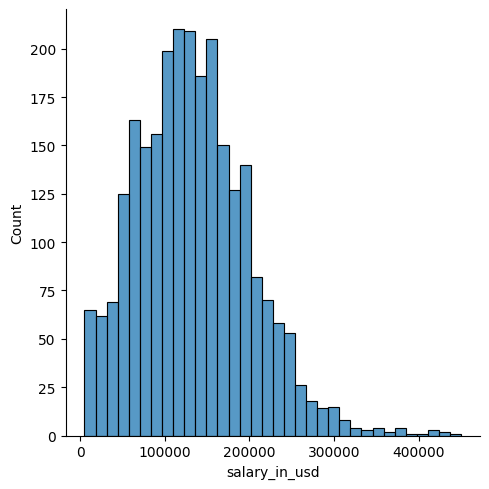

In [ ]:
# Verificar distribuição dos Salários em Dólares.
graf = sns.displot(data = df['salary_in_usd'])
plt.show(graf)

A distribuição dos Salários em Dólares não é simétrica (maior concentração em valores menores).

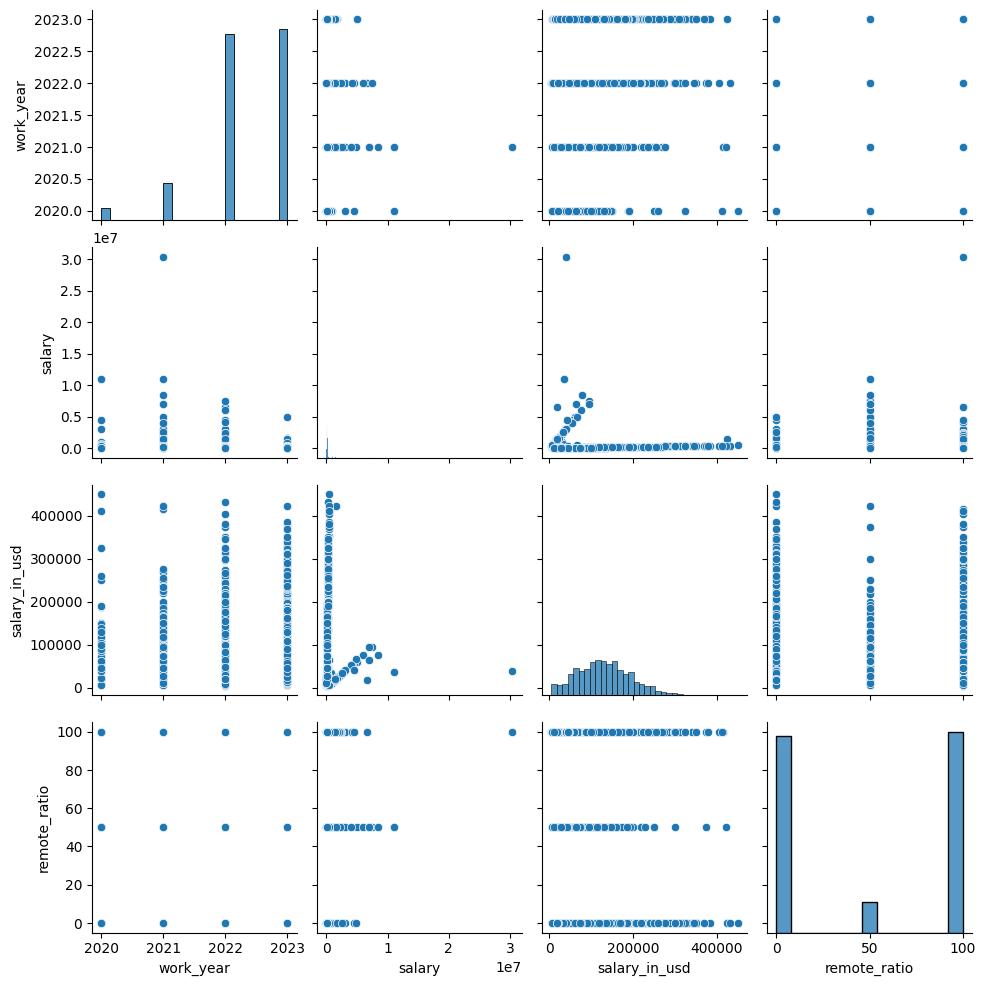

In [ ]:
# Obter uma visão geral das associações entre dados.
graf = sns.pairplot(df)
plt.show(graf)

In [ ]:
# Verificar a média dos Salários em Dólares de acordo com o Ano.
df.groupby('work_year')['salary_in_usd'].mean()

work_year
2020     93353.426667
2021     93637.385965
2022    130176.709333
2023    146998.227509
Name: salary_in_usd, dtype: float64

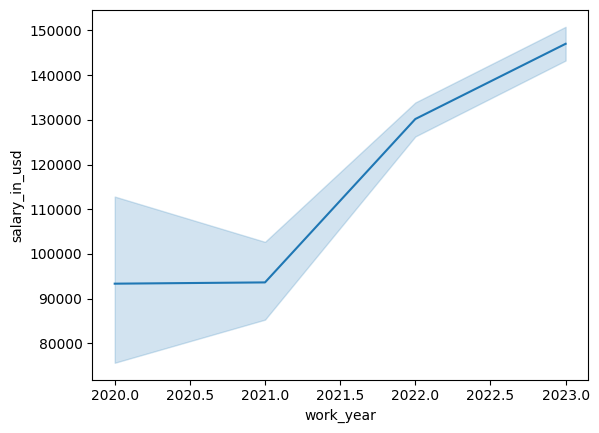

In [ ]:
# Gráfico de linhas associando Salário em Dólares ao Ano.
graf = sns.lineplot(data = df, x = 'work_year', y = 'salary_in_usd')
plt.show(graf)

Percebe-se que, nos últimos anos, a média dos Salários em Dólares aumentou. Além disso, a variância dos salários diminuiu (agora, não há distinções tão grandes entre os salários).

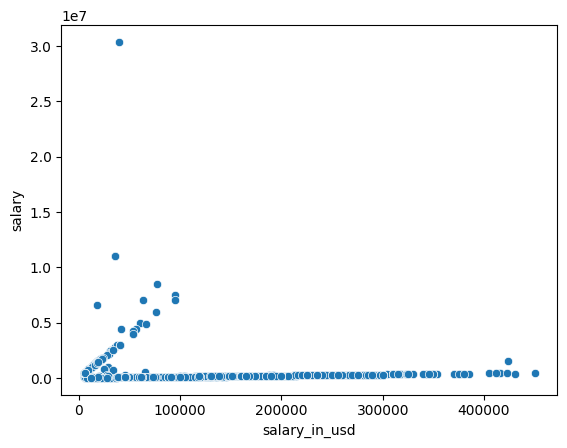

In [ ]:
# Verificar relação entre Salário na moeda local e em Dólares.
graf = sns.scatterplot(data = df, x = 'salary_in_usd', y = 'salary')
plt.show(graf)

Entre aqueles que ganham Salários em Dólar menores, seus Salários nas moedas locais tendem a ser maiores (na cotação usada para conversão dos valores), indicando que a moeda local vale menos que o dólar.
Assim, os entrevistados com os menores Salários em Dólar tendem a viver em locais cujas moedas estão desvalorizadas.

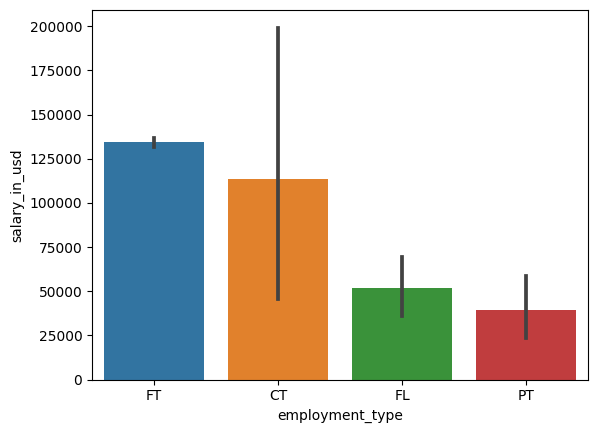

In [ ]:
# Verificar relação entre Tipo de Vínculo Empregatício e Salário em Dólar.
graf = sns.barplot(data = df, x = 'employment_type', y = 'salary_in_usd')
plt.show(graf)

O Tipo de Vínculo Empregatício claramente influencia os Salários em Dólar.

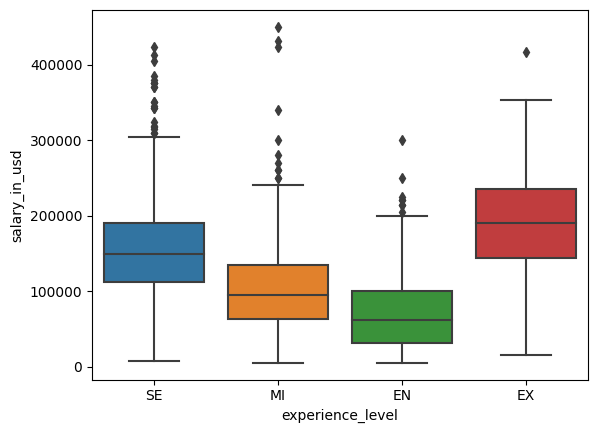

In [ ]:
# Verificar relação entre Nível de Experiência e Salário em Dólar.
graf = sns.boxplot(data = df, x = 'experience_level', y = 'salary_in_usd')
plt.show(graf)

O Nível de Experiência claramente influencia os salários.
- Nível EX tem os maiores salários;
- Seguem-se os níveis SE, MI e EN, em ordem decrescente.



---

A variação entre os salários é menor nos Níveis com menores salários. O Nível com maiores salários (EX) é o que tem maior dispersão de dados, por exemplo.

<ipython-input-43-448f3e208a71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  graf = sns.heatmap(df.corr(), annot = True)


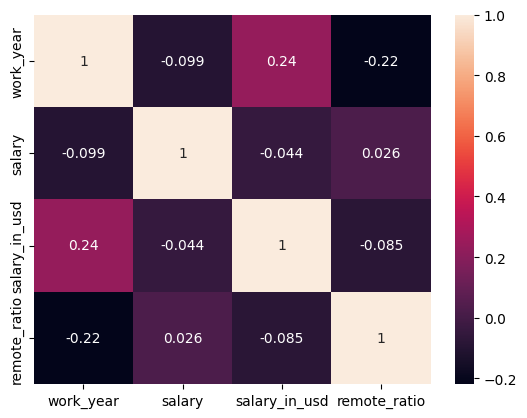

In [ ]:
graf = sns.heatmap(df.corr(), annot = True)
plt.show(graf)

Praticamente não existe correlação entre Saláario em Dólar e a porcentagem de trabalho feito remotamente.